In [36]:
#Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
#Reading file into a DataFrame
file = "Resources/netflix_shows.csv"
netflix_data = pd.read_csv(file)
netflix_data

,title,release_year,age_certification,runtime,language,genres,production_countries,seasons,imdb_score,imdb_votes
0,Monty Python's Flying Circus,1969,TV-14,30,"English, Arabic, French, German, Italian, Mand...","['comedy', 'european']",['GB'],4.0,8.8,72895.0
1,Monty Python's Fliegender Zirkus,1972,TV-MA,43,"English, German",['comedy'],[],1.0,8.1,2144.0
2,Seinfeld,1989,TV-PG,24,English,['comedy'],['US'],9.0,8.9,302700.0
3,Knight Rider,1982,TV-PG,51,English,"['action', 'scifi', 'crime', 'drama']",['US'],4.0,6.9,33760.0
4,Thomas & Friends,1984,TV-Y,10,"Spanish, French, Chinese, Japanese, English","['family', 'comedy', 'music', 'action', 'anima...",['GB'],24.0,6.5,4948.0
...,...,...,...,...,...,...,...,...,...,...
1665,Abla Fahita: Drama Queen,2021,TV-14,25,"Arabic, Turkish, English","['drama', 'comedy', 'crime']",['XX'],1.0,6.6,433.0
1666,Christmas Flow,2021,TV-MA,50,French,"['music', 'romance', 'comedy']",['FR'],1.0,5.8,702.0
1667,Korean Cold Noodle Rhapsody,2021,TV-PG,49,Korean,['documentation'],['KR'],1.0,7.3,15.0
1668,Pitta Kathalu,2021,TV-MA,37,NaN,"['drama', 'romance']",['IN'],1.0,5.1,727.0


In [6]:
#Filter data to begin from 2007 - when Netflix began its streaming service
streaming_data = netflix_data.loc[netflix_data['release_year']>=2007]
streaming_data = filtered_data.reset_index(drop=True)
streaming_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 1587 non-null   object 
 1   release_year          1587 non-null   int64  
 2   age_certification     1587 non-null   object 
 3   runtime               1587 non-null   int64  
 4   language              1487 non-null   object 
 5   genres                1587 non-null   object 
 6   production_countries  1587 non-null   object 
 7   seasons               1587 non-null   float64
 8   imdb_score            1587 non-null   float64
 9   imdb_votes            1587 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 124.1+ KB


In [8]:
#Visualise the yearly trend in production of Netflix TV shows since streaming services began in 2007
yearly_trend = streaming_data['release_year'].value_counts().sort_index()
yearly_trend

release_year
2007      7
2008     10
2009     17
2010     17
2011     29
2012     29
2013     34
2014     39
2015     87
2016    124
2017    154
2018    250
2019    234
2020    221
2021    246
2022     89
Name: count, dtype: int64

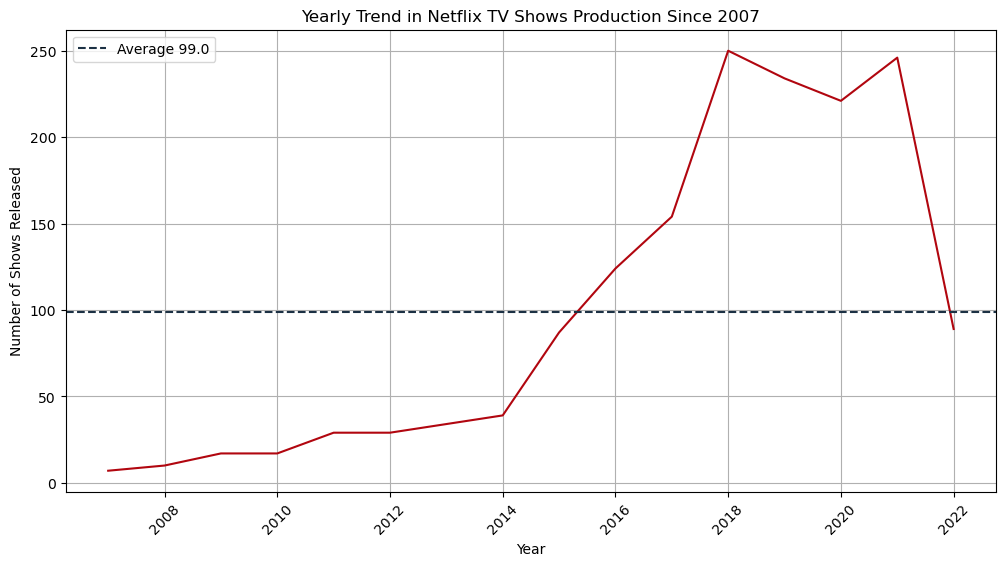

<Figure size 640x480 with 0 Axes>

In [17]:
# Plotting the yearly trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, color="#B1060F") 
plt.title('Yearly Trend in Netflix TV Shows Production Since 2007')
plt.xlabel('Year')
plt.ylabel('Number of Shows Released')
plt.xticks(rotation=45)
plt.grid(True)

# Calculate the average and add a horizontal line
average_shows = yearly_trend.mean().round()
plt.axhline(y=average_shows, color='#1C3144', linestyle='--', label=f'Average {average_shows}')
plt.legend()

plt.show()
plt.savefig("Images/02_Yearly_Trend_In_Shows.png")

In [19]:
# Function to convert string representation of list to actual list
def convert_string_to_list(string):
    try:
        return ast.literal_eval(string)
    except:
        return []

# Apply the function to genres and language columns
streaming_data['genres'] = netflix_data['genres'].apply(convert_string_to_list)
streaming_data['language'] = netflix_data['language'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Display the cleaned data
streaming_data[['release_year', 'genres', 'language']].head()


,release_year,genres,language
0,2008,"[comedy, european]","[English, Arabic, French, German, Italian, Man..."
1,2010,[comedy],"[English, German]"
2,2010,[comedy],[English]
3,2010,"[action, scifi, crime, drama]",[English]
4,2009,"[family, comedy, music, action, animation, fan...","[Spanish, French, Chinese, Japanese, English]"


In [20]:
# Exploding the genres and language columns to have separate rows for each genre and language
genre_data = streaming_data.explode('genres')
language_data = streaming_data.explode('language')

# Grouping by release year and genres, then counting the occurrences
genre_count_over_years = genre_data.groupby(['release_year', 'genres']).size().reset_index(name='count')

# Similarly, grouping by release year and language
language_count_over_years = language_data.groupby(['release_year', 'language']).size().reset_index(name='count')


In [32]:
genre_count_over_years

,release_year,genres,count
0,2007,action,3
1,2007,animation,2
2,2007,comedy,6
3,2007,crime,1
4,2007,drama,3
...,...,...,...
259,2022,reality,10
260,2022,romance,9
261,2022,scifi,11
262,2022,sport,2


In [38]:
language_count_over_years

,release_year,language,count
0,2007,English,6
1,2007,French,1
2,2008,Arabic,1
3,2008,English,9
4,2008,French,2
...,...,...,...
293,2022,Swedish,1
294,2022,Thai,1
295,2022,Tswana,1
296,2022,Turkish,1


In [ ]:
#Only account for non-English languages for shows
foreign_language_count = language_count_over_years.loc[language_count_over_years['language']=! "English"]
foreign_language_count

/var/folders/rc/csr3n42n6c91h4vjjn9_zg3c0000gn/T/ipykernel_34952/2145992435.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


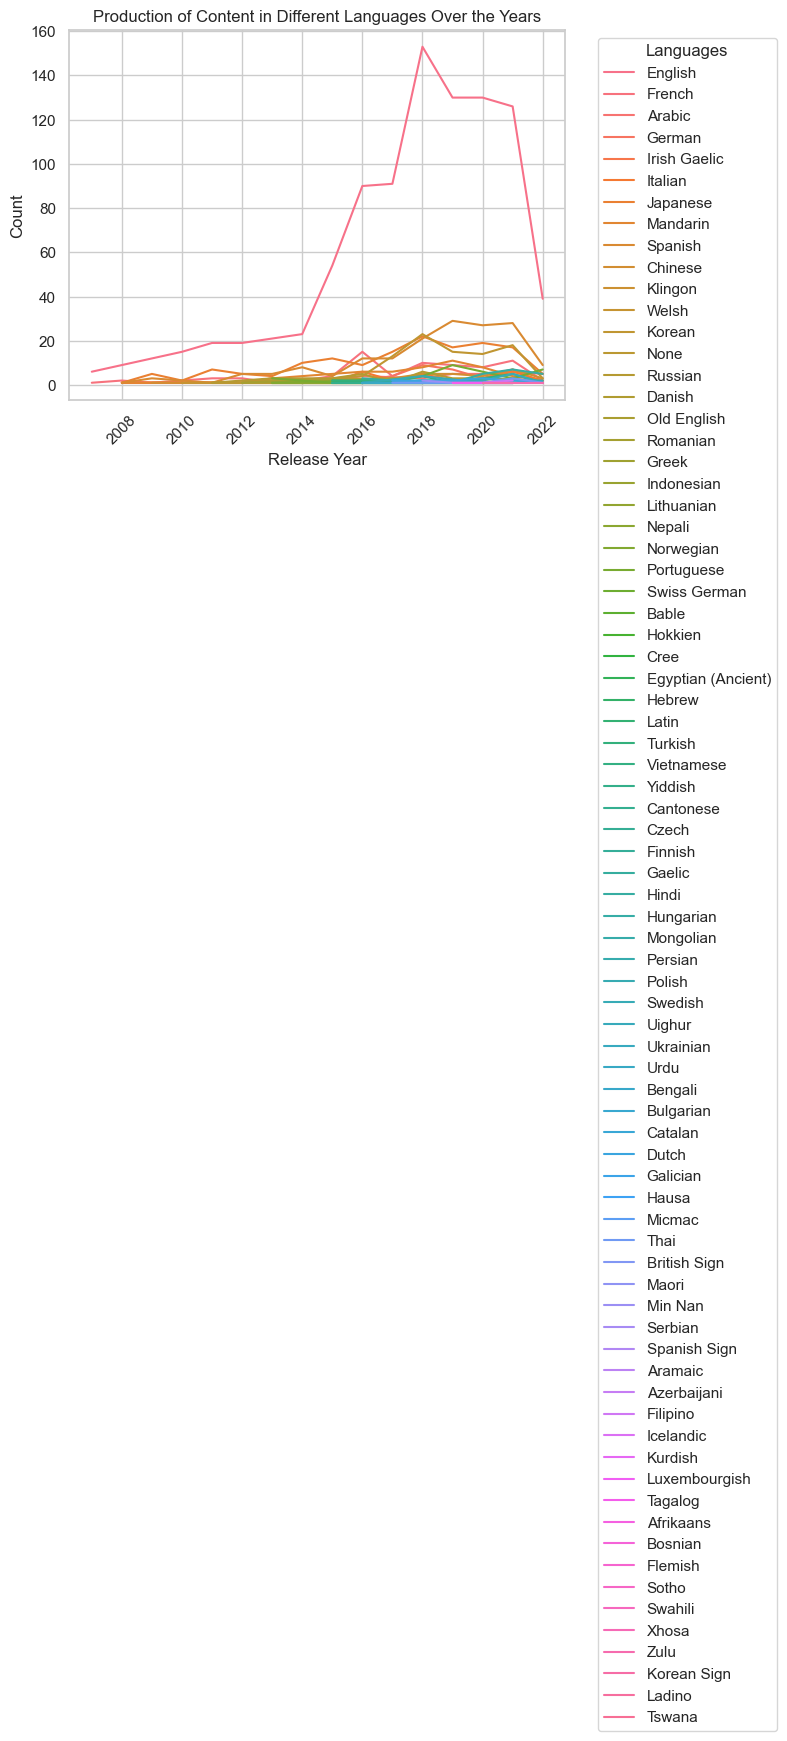

<Figure size 640x480 with 0 Axes>

In [39]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Define a red tone color palette
red_palette = sns.color_palette("Reds", n_colors=len(language_count_over_years['language'].unique()))

# Plotting languages over the years
sns.lineplot(data=language_count_over_years, x="release_year", y="count", hue="language")
plt.title('Production of Content in Different Languages Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig(("Images/02_Yearly_Trend_In_Languages.png"))